Kids: 208
'Others' kids: 42
subjects: 22
'Others' Subjects: 228
Filtered (contain both subject and kid): 13


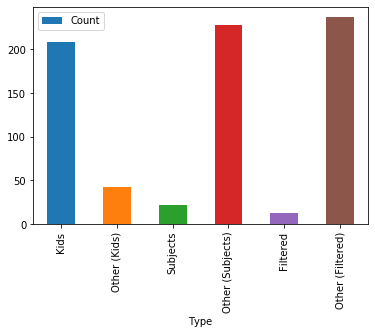

In [2]:
import json
import itertools 
import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pp = pprint.PrettyPrinter(indent=4)

kid_arr = ["kid", "kids", "child", "children", "student", "students"]
subject_arr = ["security", "privacy", "online safety", "secure", "private", "cybersecurity", "computer security"] # check for cyber security??


def filter_terms(terms):
	kids_apps_dict = {}
	kids_other_apps_dict = {}
	subject_apps_dict = {}
	subject_other_apps_dict = {}
	kids_count = 0
	other_kids_count = 0
	subject_count = 0
	other_subject_count = 0


	# iterate over textrank outputs for all apps
	for i in range(0, len(terms)):
		appId = terms[i]['app_id']
		title = terms[i]['title']
		del terms[i]['app_id']
		del terms[i]['title']

		out = dict(itertools.islice(terms[i].items(), 10)) # get the top 10 TextRank vectors

		terms[i]['app_id'] = appId
		terms[i]['title'] = title
		out['app_id'] = appId
		out['title'] = title

		# filter by kids
		for kid in kid_arr:
			# check if term from kid_arr is in the top10 TR vectors for a given app and has not already been recorded
			if((kid in out) and (out['app_id'] not in kids_apps_dict)):
				kids_apps_dict[out['app_id']] = out
				#kids_count += 1

		# filter by subject
		for subject in subject_arr:
			# check if term from subject_arr is in the top10 TR vectors for a given app and has not already been recorded
			if((subject in out) and (out['app_id'] not in subject_apps_dict)):
				subject_apps_dict[out['app_id']] = out
				# subject_count += 1

	for i in range(0, len(terms)): 
		if terms[i]['app_id'] not in kids_apps_dict:
			kids_other_apps_dict[terms[i]['app_id']] = terms[i]
			other_kids_count += 1
		else:
			kids_count += 1

		if terms[i]['app_id'] not in subject_apps_dict:
			subject_other_apps_dict[terms[i]['app_id']] = terms[i]
			other_subject_count += 1
		else:
			subject_count += 1

	filtered_list = []
	for app in kids_apps_dict:
		if app in subject_apps_dict:
			filtered_list.append(kids_apps_dict[app])

	print("Kids: " + str(kids_count))
	print("'Others' kids: " + str(other_kids_count))
	print("subjects: " + str(subject_count))
	print("'Others' Subjects: " + str(other_subject_count))
	print("Filtered (contain both subject and kid): " + str(len(filtered_list)))

	# initialize list of lists 
	data = [['Kids', kids_count], ['Other (Kids)', other_kids_count], ['Subjects', subject_count], ['Other (Subjects)', other_subject_count],
           ['Filtered', len(filtered_list)], ['Other (Filtered)', (250-len(filtered_list))]] 
	  
	# Create the pandas DataFrame 
	df = pd.DataFrame(data, columns = ['Type', 'Count']) 
	  

	# df = pd.DataFrame(data)
	df.plot(kind='bar',x='Type',y='Count')
	# df.groupby('Count')['Type'].nunique().plot(kind='bar')


# get list of terms from TextRank and then calculate IDF for each term
# read the entire file into a python array
with open('teach_kids_about_privacy_textrank.json', "r") as read_file:
    terms = json.load(read_file)
    # print(terms)
    filter_terms(terms)